<a href="https://colab.research.google.com/github/utkarshtambe10/LetsGrowMore-Data-Science-Internship-Tasks/blob/main/Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LetsGrowMore - Intermediate Level Task 2
##Prediction using Decision Tree Algorithm

Applying Decision Tree Algorithm on Iris Dataset.

In [ ]:
import warnings
warnings.filterwarnings('ignore')


#Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Importing Dataset

In [ ]:
#downloading/importing dataset from google drive
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
url = "/content/drive/MyDrive/Iris.csv"
dt = pd.read_csv(url)


In [ ]:
dt.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dt.tail()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#Exploration of Dataset

In [ ]:
dt.shape


(150, 6)

In [ ]:
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dt.isnull().sum()  #checking for any null values are present


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
dt.describe()  #looking for statistical description


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
dt.nunique()


Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [ ]:
dt["Species"].unique()  #looking for different species of flowers


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#renaming the columns/attributes names
dt.rename(columns = {'SepalLengthCm':'sepal length (cm)','SepalWidthCm':'sepal width (cm)',
                   'PetalLengthCm':'petal length (cm)','PetalWidthCm':'petal width (cm)'}, inplace = True)


In [ ]:
dt.head()


,Id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#Data Visualization

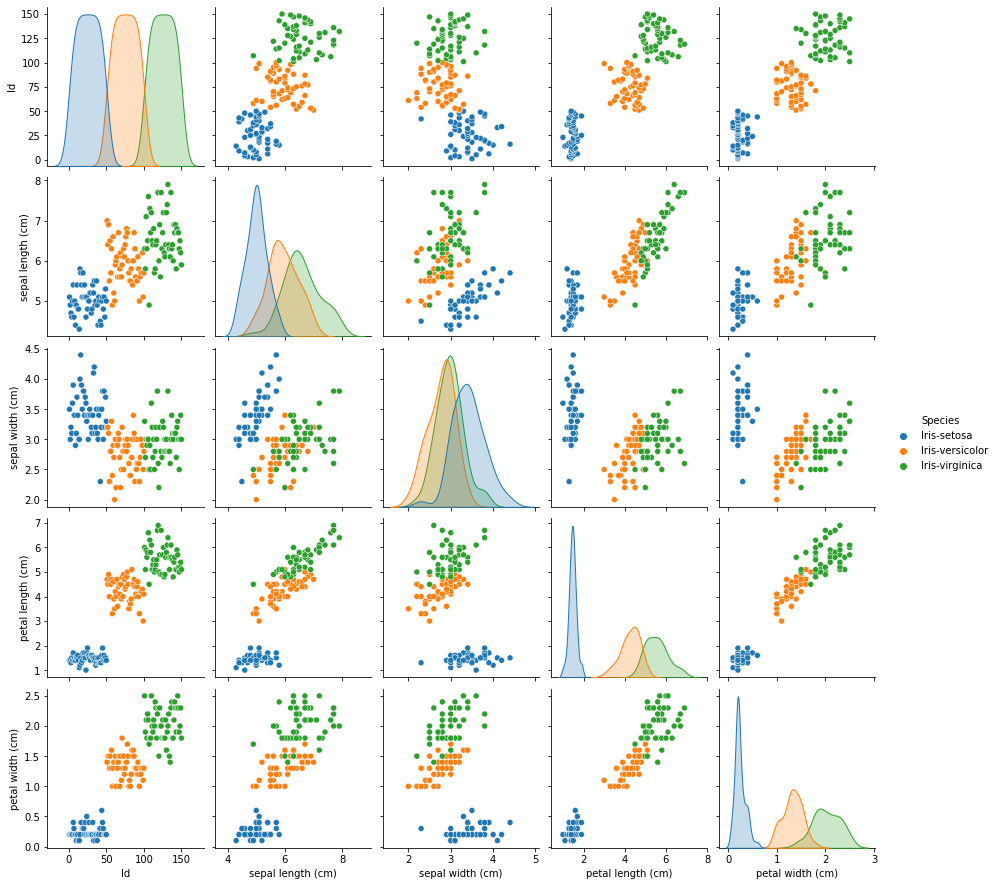

In [ ]:
sns.pairplot(data = dt, hue = "Species")
plt.show()


* We can observe that species "Iris Setosa" make distinctive cluster in every parameter, while other two species overlap.

In [ ]:
dt.corr()


,Id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
sepal length (cm),0.716676,1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.397729,-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.882747,0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.899759,0.817954,-0.356544,0.962757,1.000000


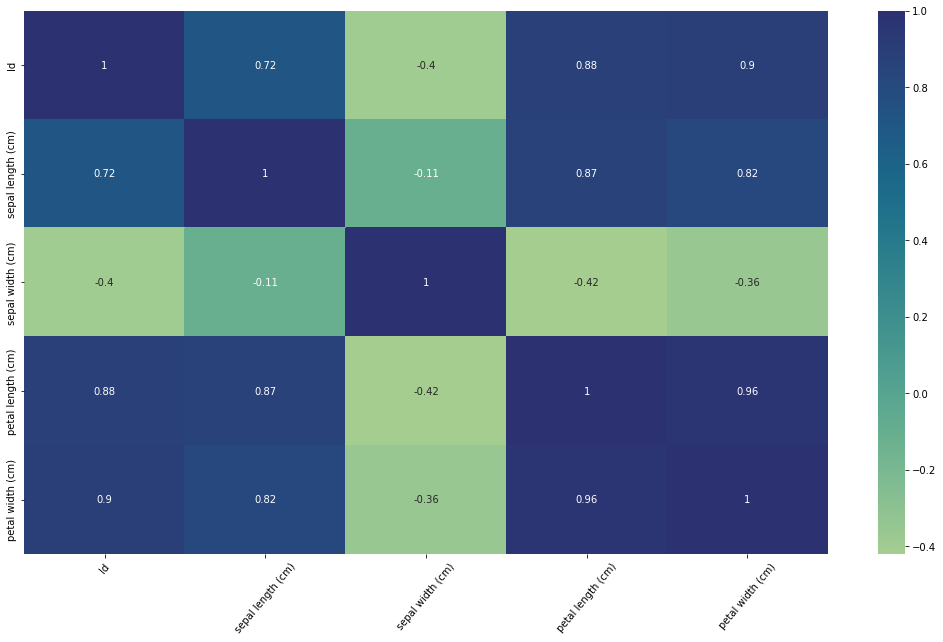

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(data= dt.corr(), annot= True, cmap="crest")

plt.xticks(fontsize = 10, rotation = 50)
plt.yticks(fontsize = 10)

plt.show()


* Bright color shows positive correlation & Dark color shows negative correlation.

* From above we can infer that, Petel length (cm) is highly correlated with Petal width (cm).

* Sepal width (cm) and Petel length (cm) is negatively correlated with each other.

#Decision Tree Algorithm

In [ ]:
x = dt.drop(["Species", "Id"], axis = 1)  #'x' for features

y = dt["Species"]  #'y' for target column

In [ ]:
x.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()


0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

#Data Splitting for Training and Testing

For training and testing the model, we will have to split the data into 70% and 30% categories; wherein, 70% is for training the data and 30% for testing the data.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 19)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)


(105, 4)
(45, 4)
(105,)
(105,)


#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()  #creating an instance of DecisionTreeClassifier

dtree.fit(x_train, y_train)  #fitting the data
print("Decision Tree Algorithm is implemented successfully")

y_pred = dtree.predict(x_test)


Decision Tree Algorithm is implemented successfully


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)  #confusion matrix
print("Confusion Matrix: ")
print(cm)
print("\n")

acc = accuracy_score(y_test, y_pred)  #accuracy
print("Accuracy: ", acc * 100)

print("Classification Report: ")  #classification report
print(classification_report(y_test, y_pred))


Confusion Matrix: 
[[14  0  0]
 [ 0 16  0]
 [ 0  3 12]]


Accuracy:  93.33333333333333
Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.84      1.00      0.91        16
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.93        45
      macro avg       0.95      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



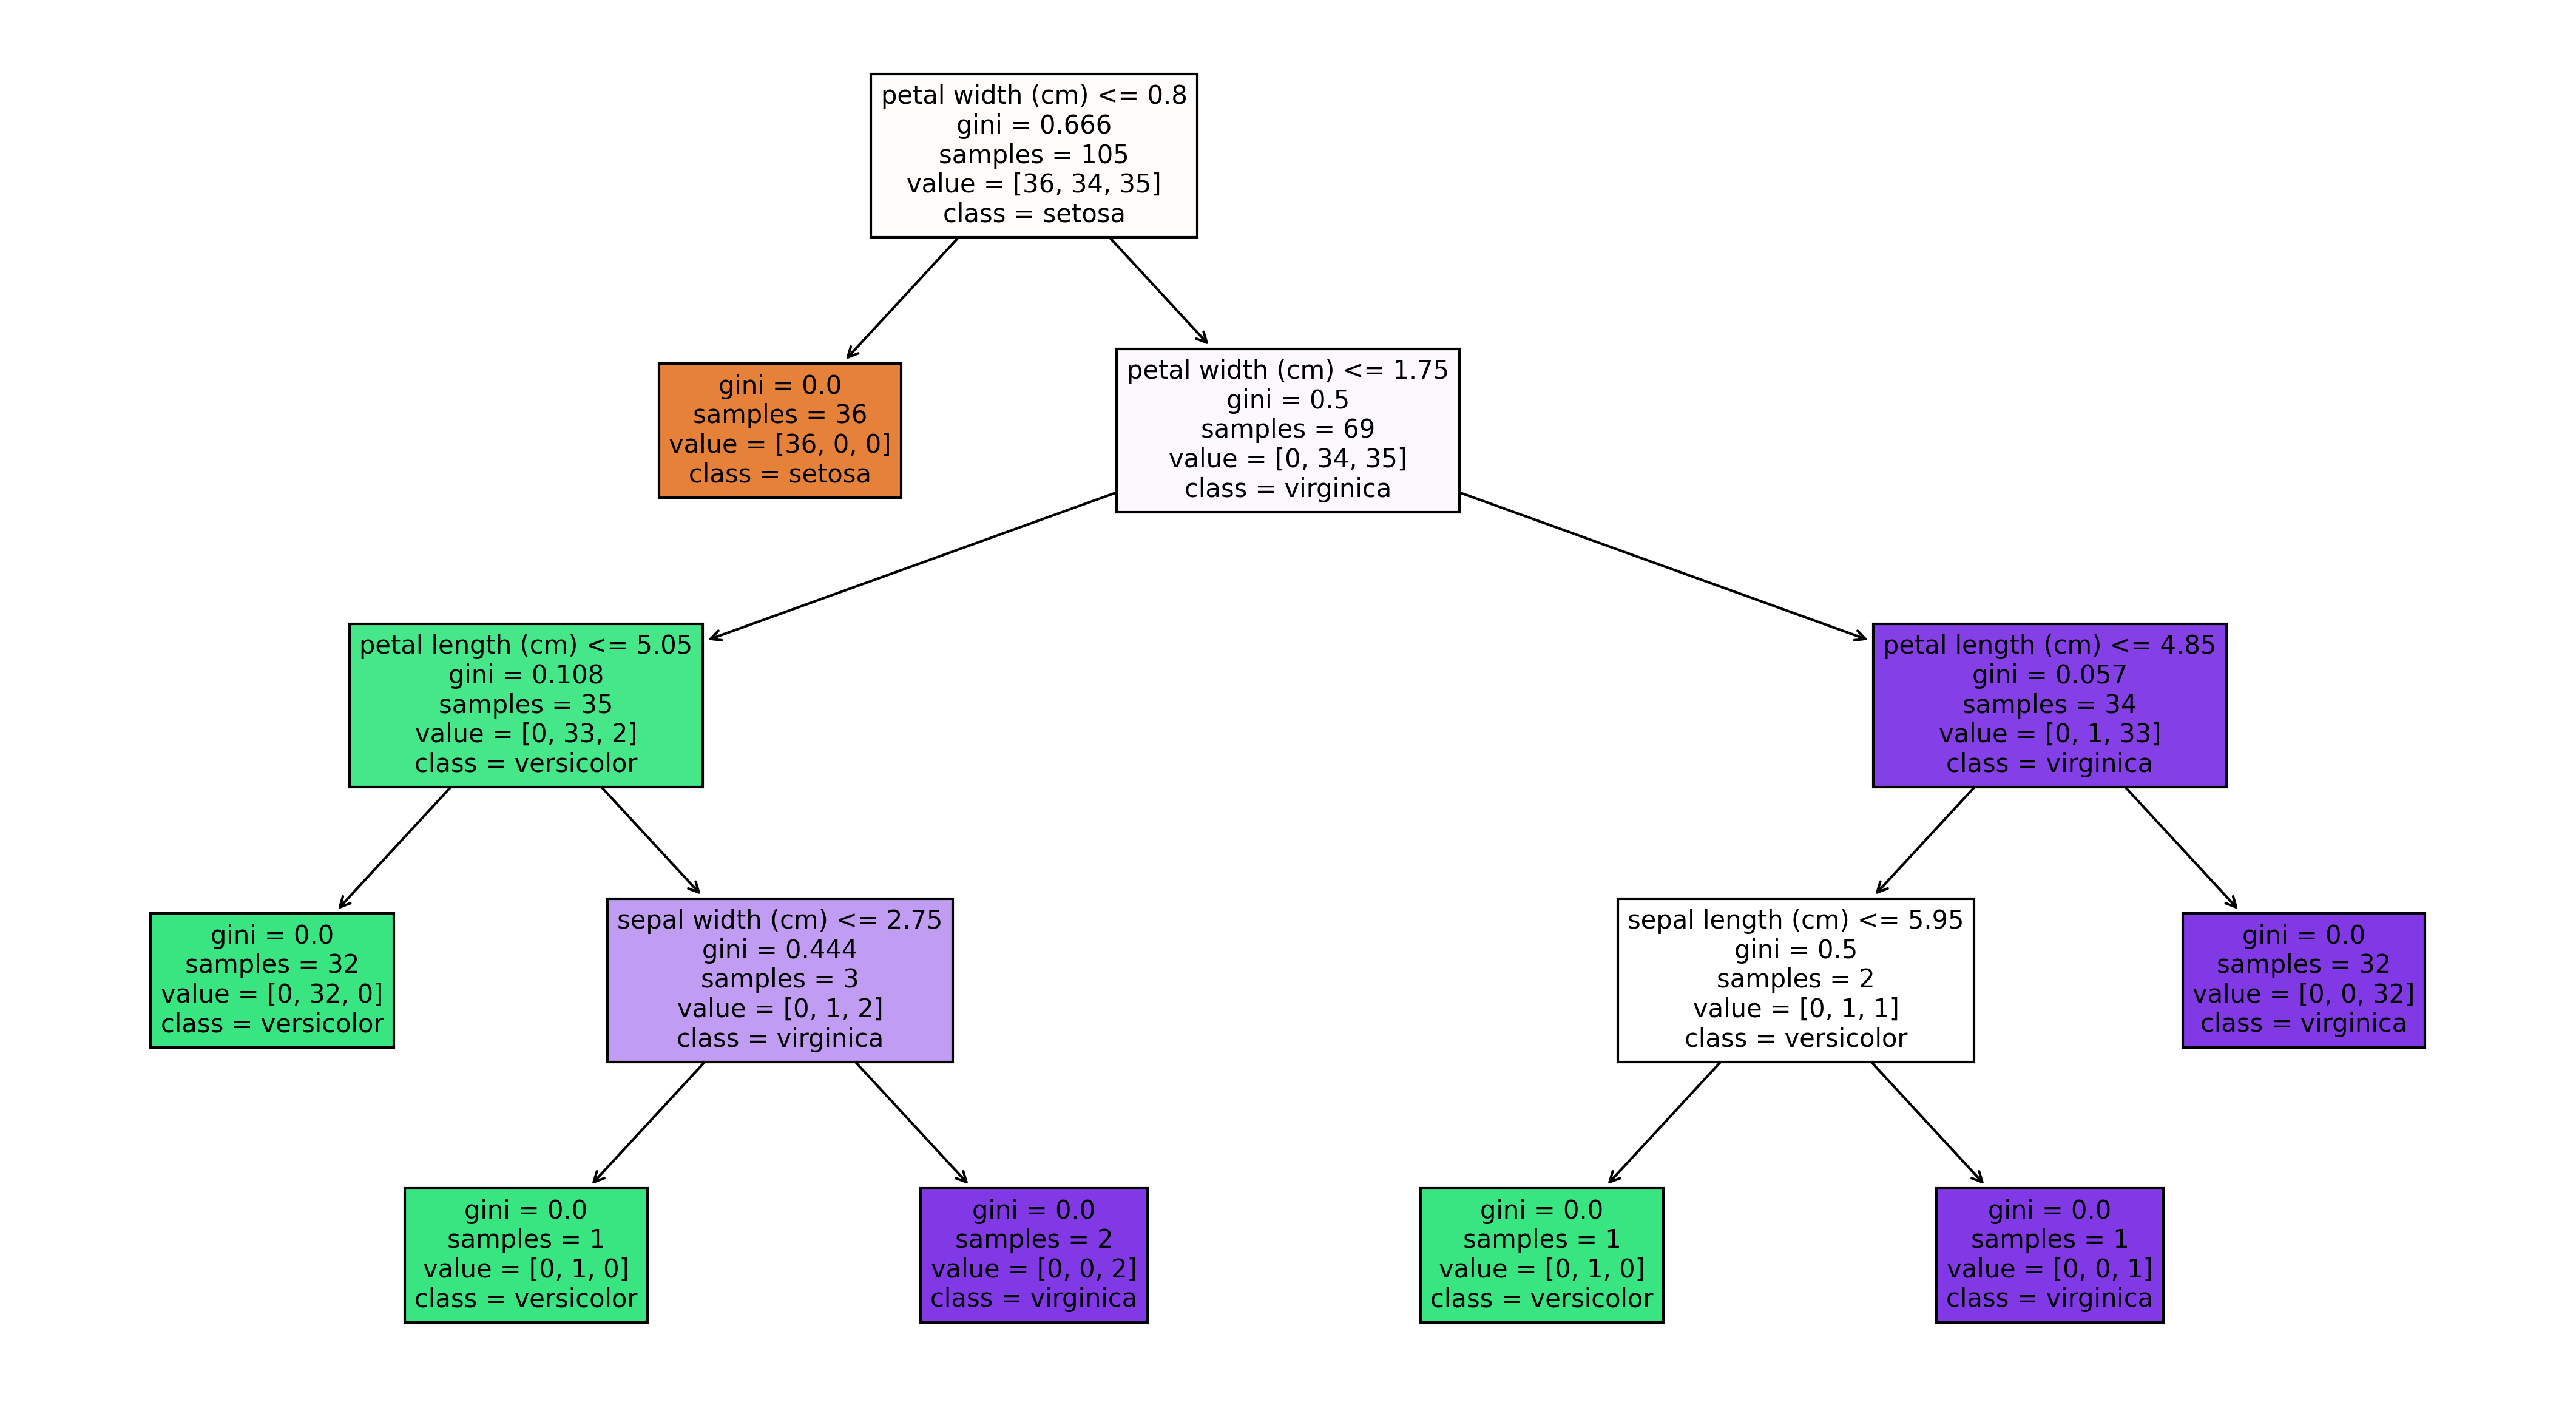

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn import tree

fn = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

cn = ['setosa', 'versicolor', 'virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 10), dpi = 300)
tree.plot_tree(dtree, feature_names = fn, class_names = cn, fontsize = 10, filled = True);

plt.show()
plt.tight_layout()
